In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
data = load_breast_cancer()
data.target = pd.Series(data.target)

## Reverse the labels because for some reason scikit learn stores the cancer as 0 and benign as 1, 
# this is opposite what everyone else in the world does
data.target.replace({0:1, 1:0}, inplace=True)

In [3]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [4]:
clf = DecisionTreeClassifier()

In [5]:
## make our training and test sets
X_train, X_test, y_train,y_test = train_test_split(data.data, data.target, stratify = data.target)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)

In [6]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report, fbeta_score

In [7]:
## precision
precision = precision_score(y_test,predictions)
print(precision)

0.8596491228070176


In [8]:
## recall
recall = recall_score(y_test,predictions)
print(recall)


0.9245283018867925


In [9]:
## f1_score
f1=f1_score(y_test,predictions)
print(f1)


0.8909090909090909


In [10]:
## fbeta_score
## you can control the beta variable in the f-score here
fb=fbeta_score(y_test,predictions,average="macro",beta=0.2)
print(fb)


0.9068806785231008


In [18]:
## Confusion Matrix
## Remember this matrix is confusing! Scikit-learn does it backwards...:grin:
cm=confusion_matrix(y_test,predictions)
print(cm)


[[82  8]
 [ 4 49]]


In [19]:
## Classification Report
cf=classification_report(y_test,predictions)
print(cf)


              precision    recall  f1-score   support

           0       0.95      0.91      0.93        90
           1       0.86      0.92      0.89        53

    accuracy                           0.92       143
   macro avg       0.91      0.92      0.91       143
weighted avg       0.92      0.92      0.92       143



In [20]:
## Classification Report
cf=classification_report(y_test,predictions)
print(cf)


              precision    recall  f1-score   support

           0       0.95      0.91      0.93        90
           1       0.86      0.92      0.89        53

    accuracy                           0.92       143
   macro avg       0.91      0.92      0.91       143
weighted avg       0.92      0.92      0.92       143



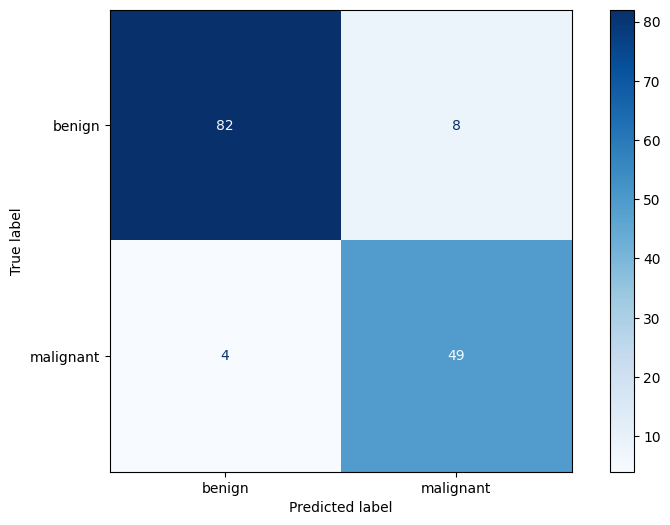

In [16]:
# we perform a flip on the target names, to match 1==malignant and 0==benign
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
c = ConfusionMatrixDisplay(confusion_matrix(y_test,predictions), display_labels=np.flip(data.target_names))
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,6))
c.plot(ax = ax, cmap='Blues', xticks_rotation = 0)

[Text(0.709375, 0.9444444444444444, 'x[20] <= 16.795\ngini = 0.468\nsamples = 426\nvalue = [267, 159]'),
 Text(0.5520833333333334, 0.8333333333333334, 'x[27] <= 0.16\ngini = 0.179\nsamples = 291\nvalue = [262, 29]'),
 Text(0.4375, 0.7222222222222222, 'x[27] <= 0.136\ngini = 0.091\nsamples = 273\nvalue = [260, 13]'),
 Text(0.30833333333333335, 0.6111111111111112, 'x[10] <= 0.626\ngini = 0.039\nsamples = 251\nvalue = [246, 5]'),
 Text(0.21666666666666667, 0.5, 'x[6] <= 0.12\ngini = 0.024\nsamples = 248\nvalue = [245, 3]'),
 Text(0.13333333333333333, 0.3888888888888889, 'x[14] <= 0.003\ngini = 0.016\nsamples = 244\nvalue = [242, 2]'),
 Text(0.06666666666666667, 0.2777777777777778, 'x[19] <= 0.001\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.03333333333333333, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.1, 0.16666666666666666, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.2, 0.2777777777777778, 'x[21] <= 33.35\ngini = 0.008\nsamples = 238\nvalue 

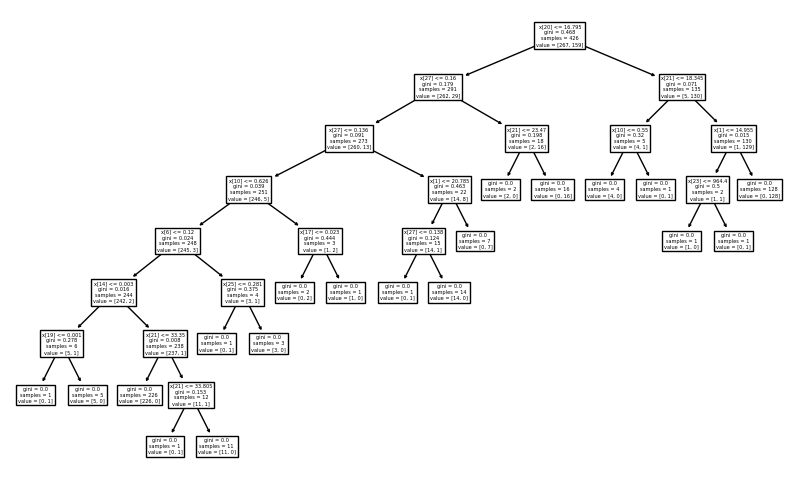

In [21]:
# this is a little sneak peak at the next module!

from sklearn import tree
fig, ax = plt.subplots(figsize=(10,6))
tree.plot_tree(clf, ax =ax)